# House prices exploratory data analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 500)

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('../data/raw/train.csv')

In [41]:
## Apply log and z score transformations
def z_std(x):
    z_score = (x - x.mean()) / x.std()
    return(z_score)

df['SalePrice_z'] = z_std(df[['SalePrice']])
df['LotArea_z'] = z_std(df[['LotArea']])

df['log_SalePrice'] = np.log(df['SalePrice'])
df['log_LotArea'] = np.log(df['LotArea'])
#df['LotArea_z'] = (df[['LotArea']] - df[['LotArea']].mean()) / df[['LotArea']].std()

## Check for nulls in all columns

In [4]:
# Count missings in all columns
missings = df.isna().sum()

# Show columns with missing value
missings[missings > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Look at distribution of target variable (SalePrice)

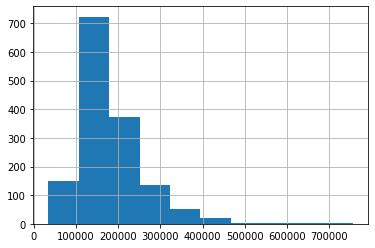

In [5]:
# Real positive variable - exhibits positive skew
df['SalePrice'].hist()

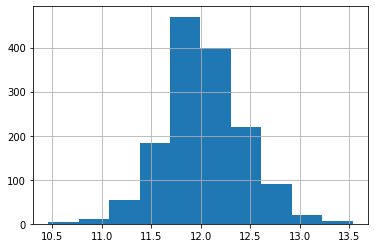

In [6]:
# Take log
np.log(df['SalePrice']).hist()

## Look at relationship between lot size and sale price

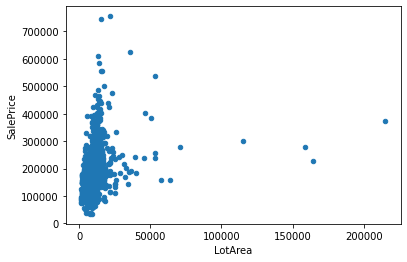

In [8]:
# Roughly positive
df[['SalePrice', 'LotArea']].plot.scatter(x = 'LotArea', y = 'SalePrice')

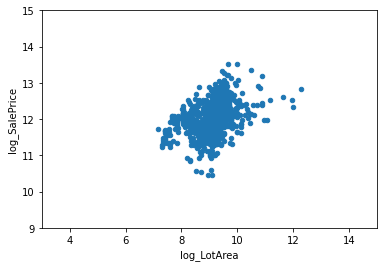

In [51]:
# Take logs
df[['log_SalePrice', 'log_LotArea']].plot.scatter(x = 'log_LotArea', 
                                                  y = 'log_SalePrice',
                                                 xlim = (3, 15),
                                                 ylim = (9, 15))

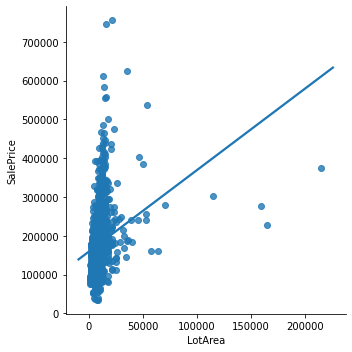

In [53]:
sns.lmplot(x='LotArea',y='SalePrice',data=df,fit_reg=True, ci=False) 

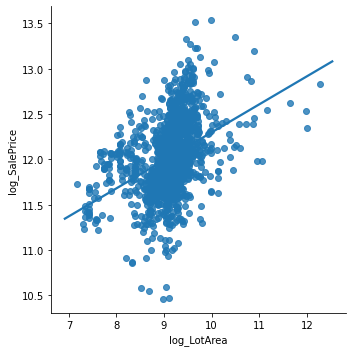

In [54]:
# Definitely some confounding and within group variation here. 
sns.lmplot(x='log_LotArea',y='log_SalePrice',data=df,fit_reg=True, ci = False) 

## Let's see if the gradient between lot are and sales price varies by neighborhood

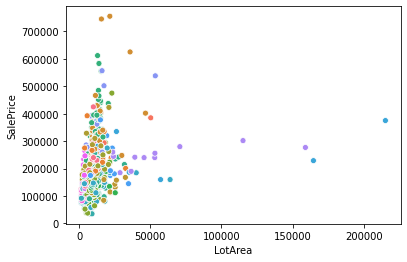

In [116]:
sns.scatterplot(x="LotArea", y="SalePrice", hue="Neighborhood",
              data=df, legend = False)

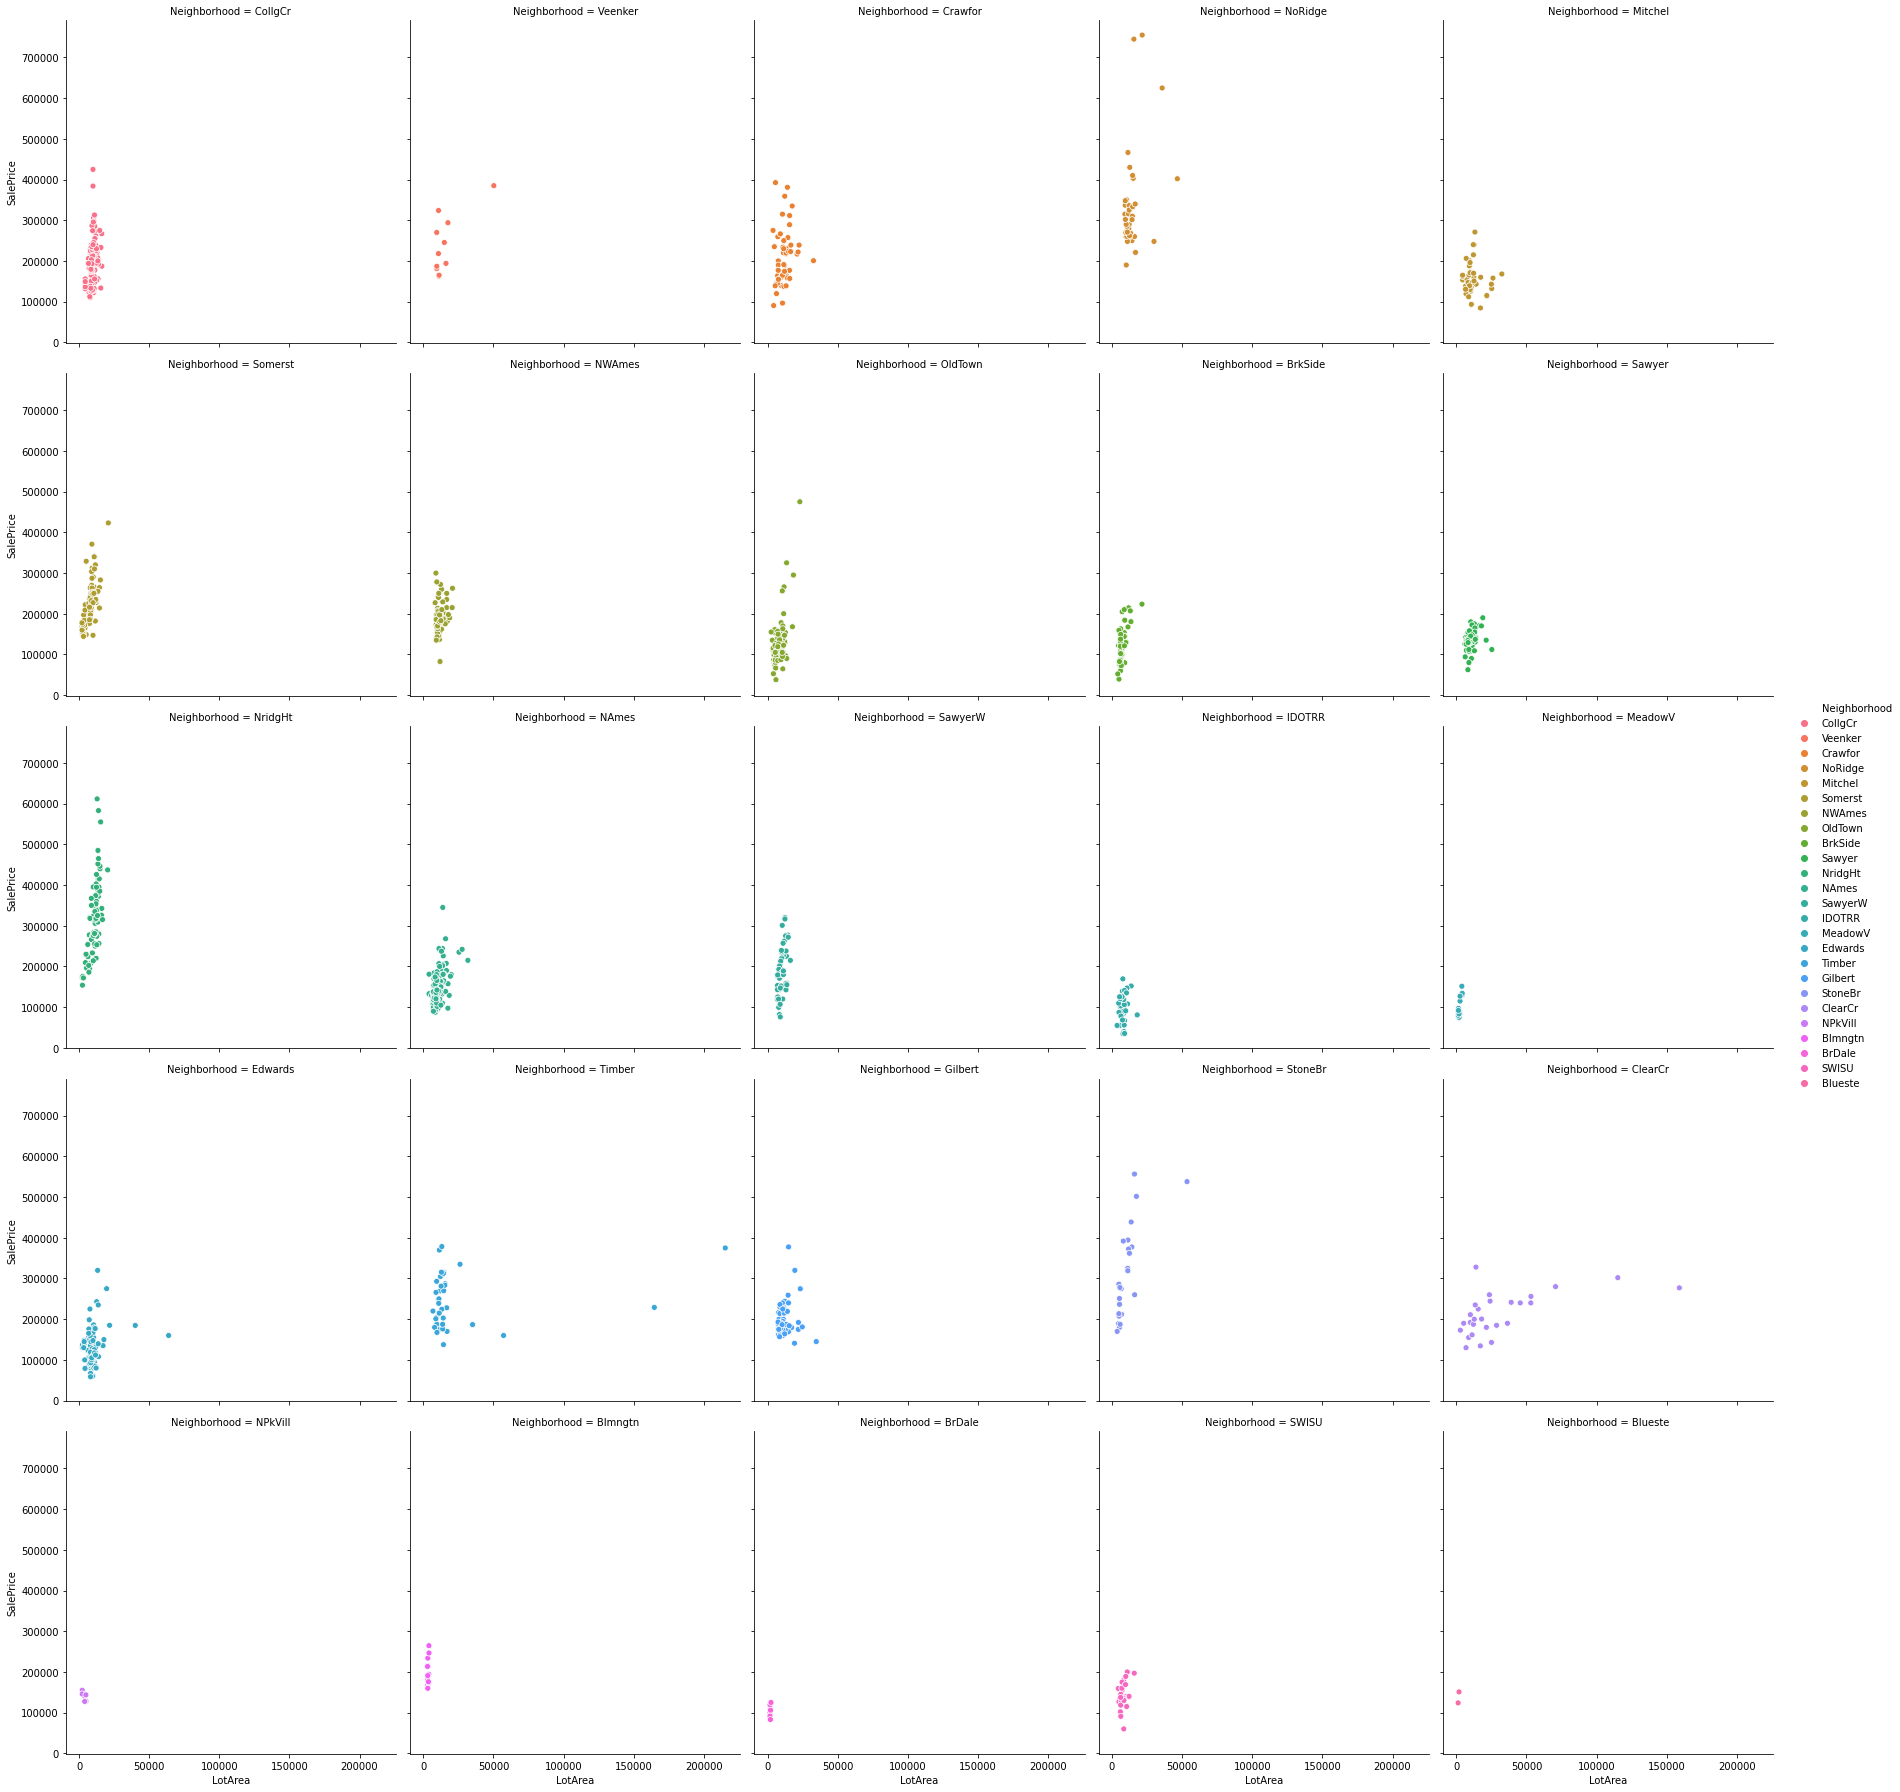

In [11]:
sns.relplot(x="LotArea", 
            y="SalePrice", 
            hue="Neighborhood",
            col="Neighborhood",
            kind="scatter", 
            col_wrap = 5,
            data=df)

In [28]:
df['log_LotArea']

0       9.041922
1       9.169518
2       9.328123
3       9.164296
4       9.565214
          ...   
1455    8.976768
1456    9.486076
1457    9.109636
1458    9.181632
1459    9.204020
Name: log_LotArea, Length: 1460, dtype: float64

## Check for heterogeneity in gradients

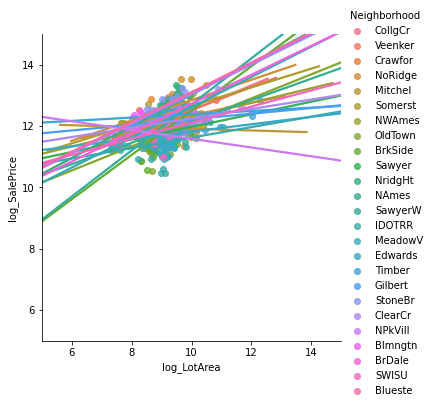

In [47]:
g = sns.lmplot(x="log_LotArea", 
            y="log_SalePrice", 
            hue="Neighborhood",
            data=df,
            ci = None)

g.set(xlim=(5, 15))
g.set(ylim=(5, 15))

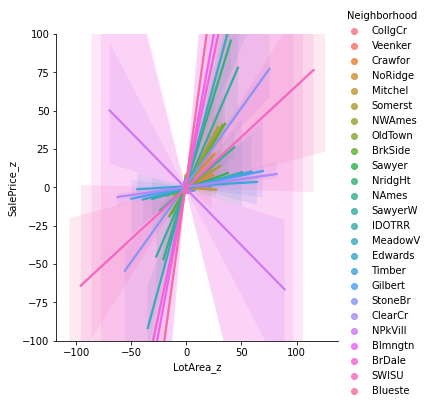

In [35]:
g = sns.lmplot(x="LotArea_z", 
            y="SalePrice_z", 
            hue="Neighborhood",
            data=df)

g.set(ylim=(-100, 100))


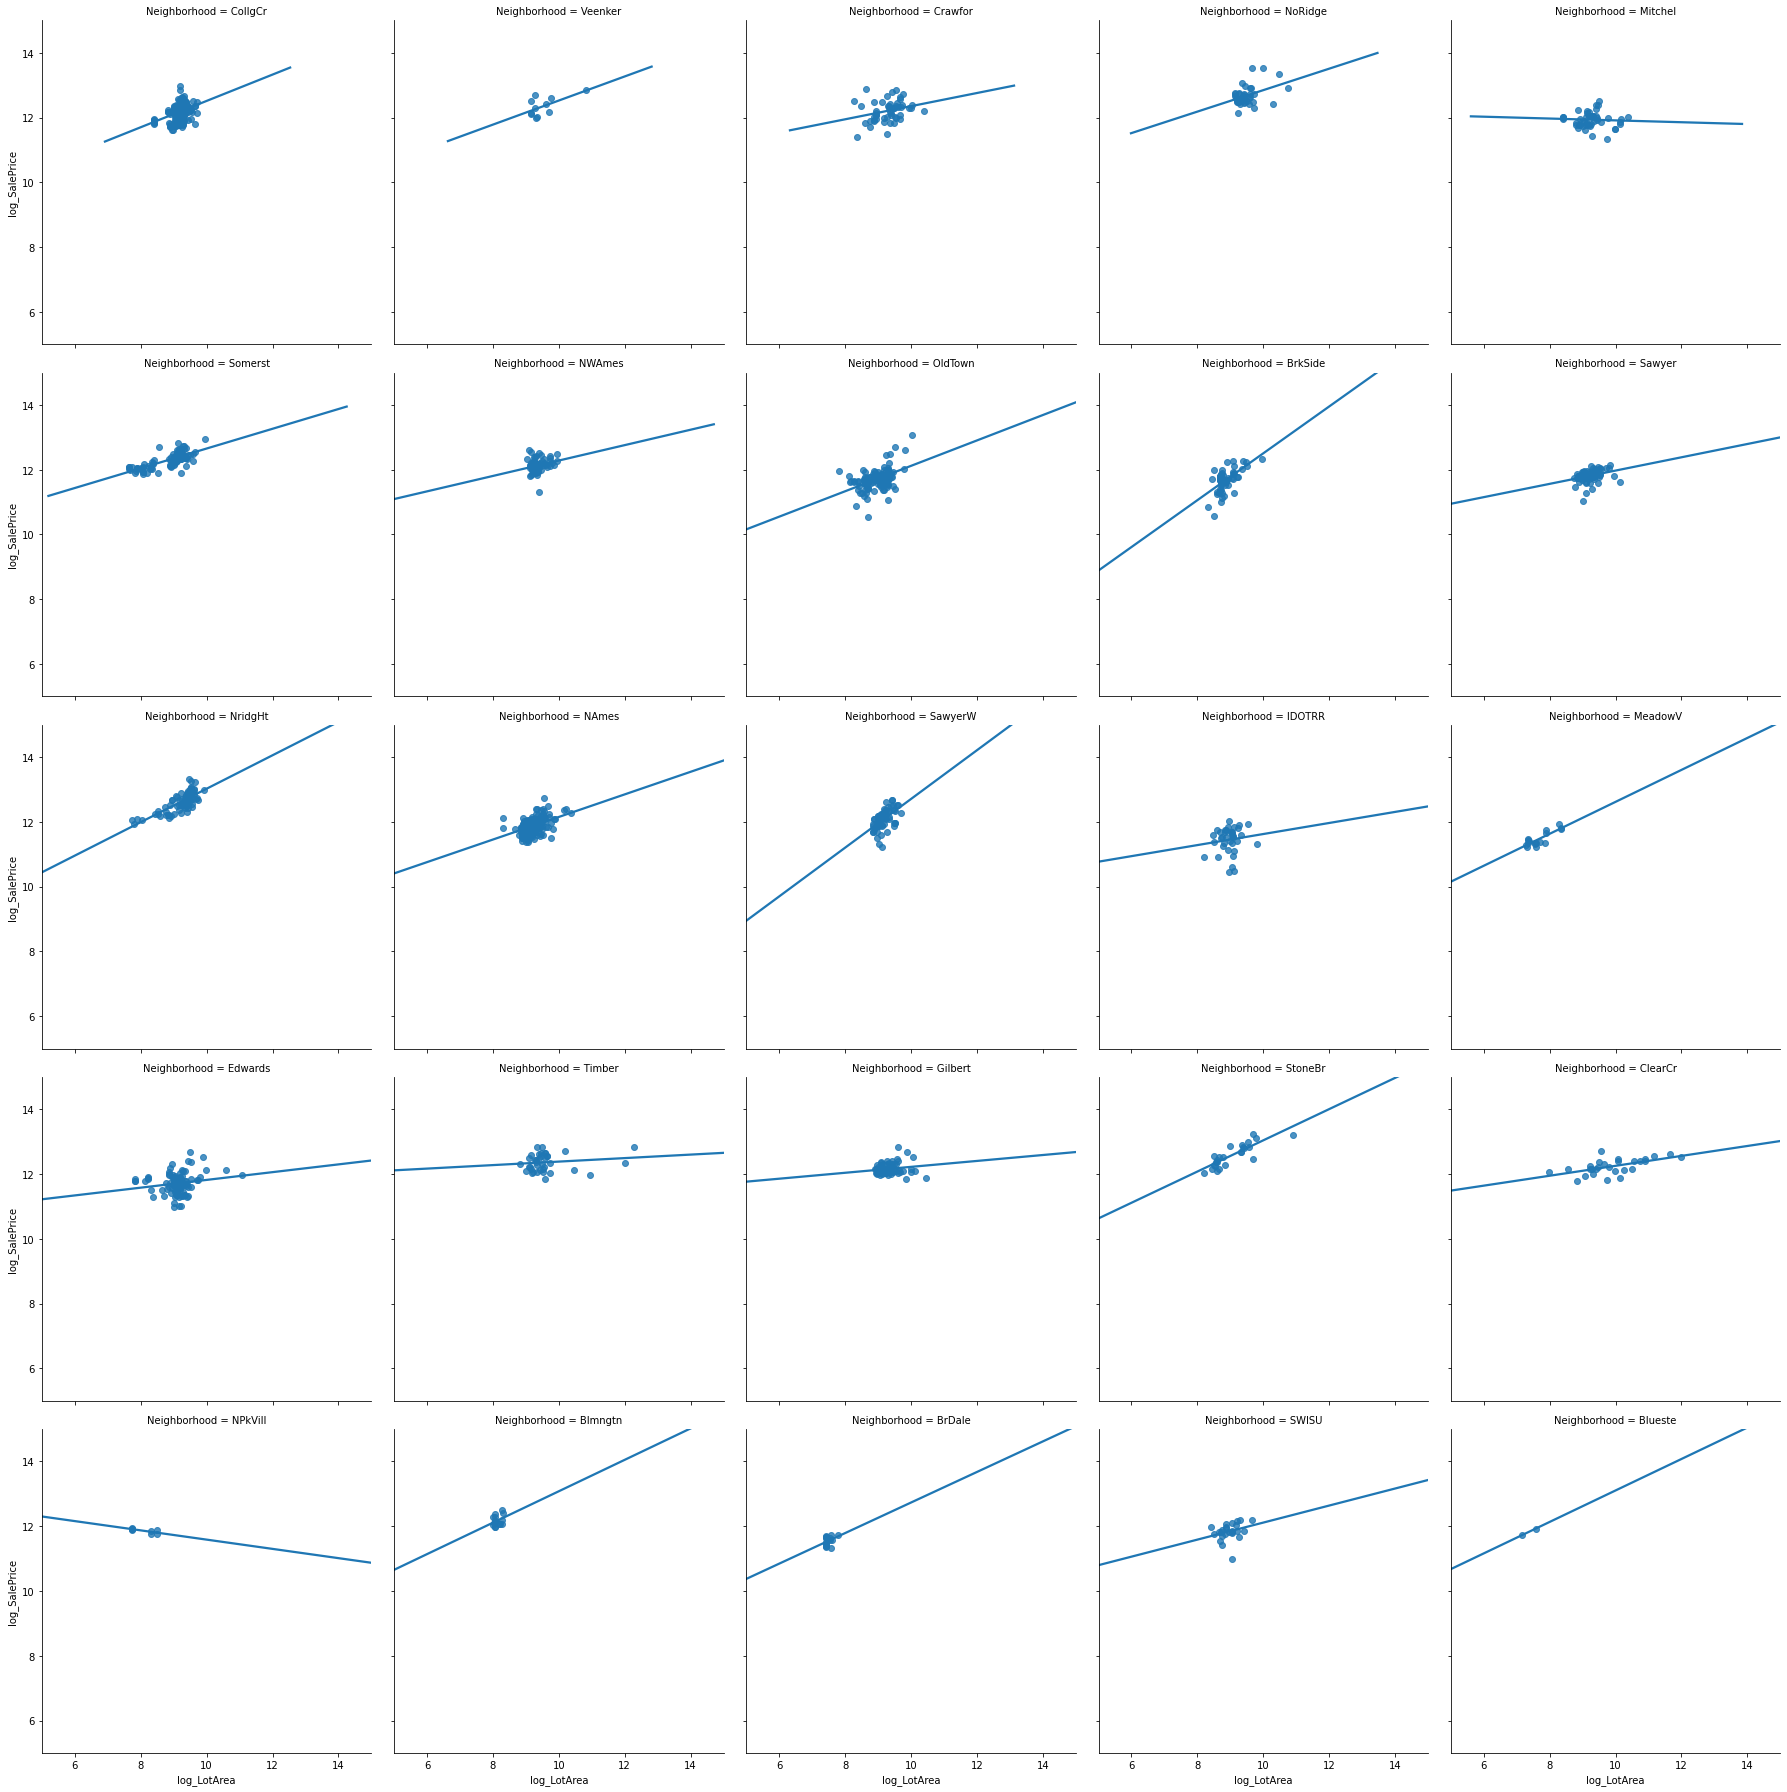

In [40]:
g = sns.lmplot(x="log_LotArea", 
            y="log_SalePrice", 
            col="Neighborhood",
            col_wrap = 5,
            data=df,
            ci = None)

g.set(xlim=(5, 15))
g.set(ylim=(5, 15))

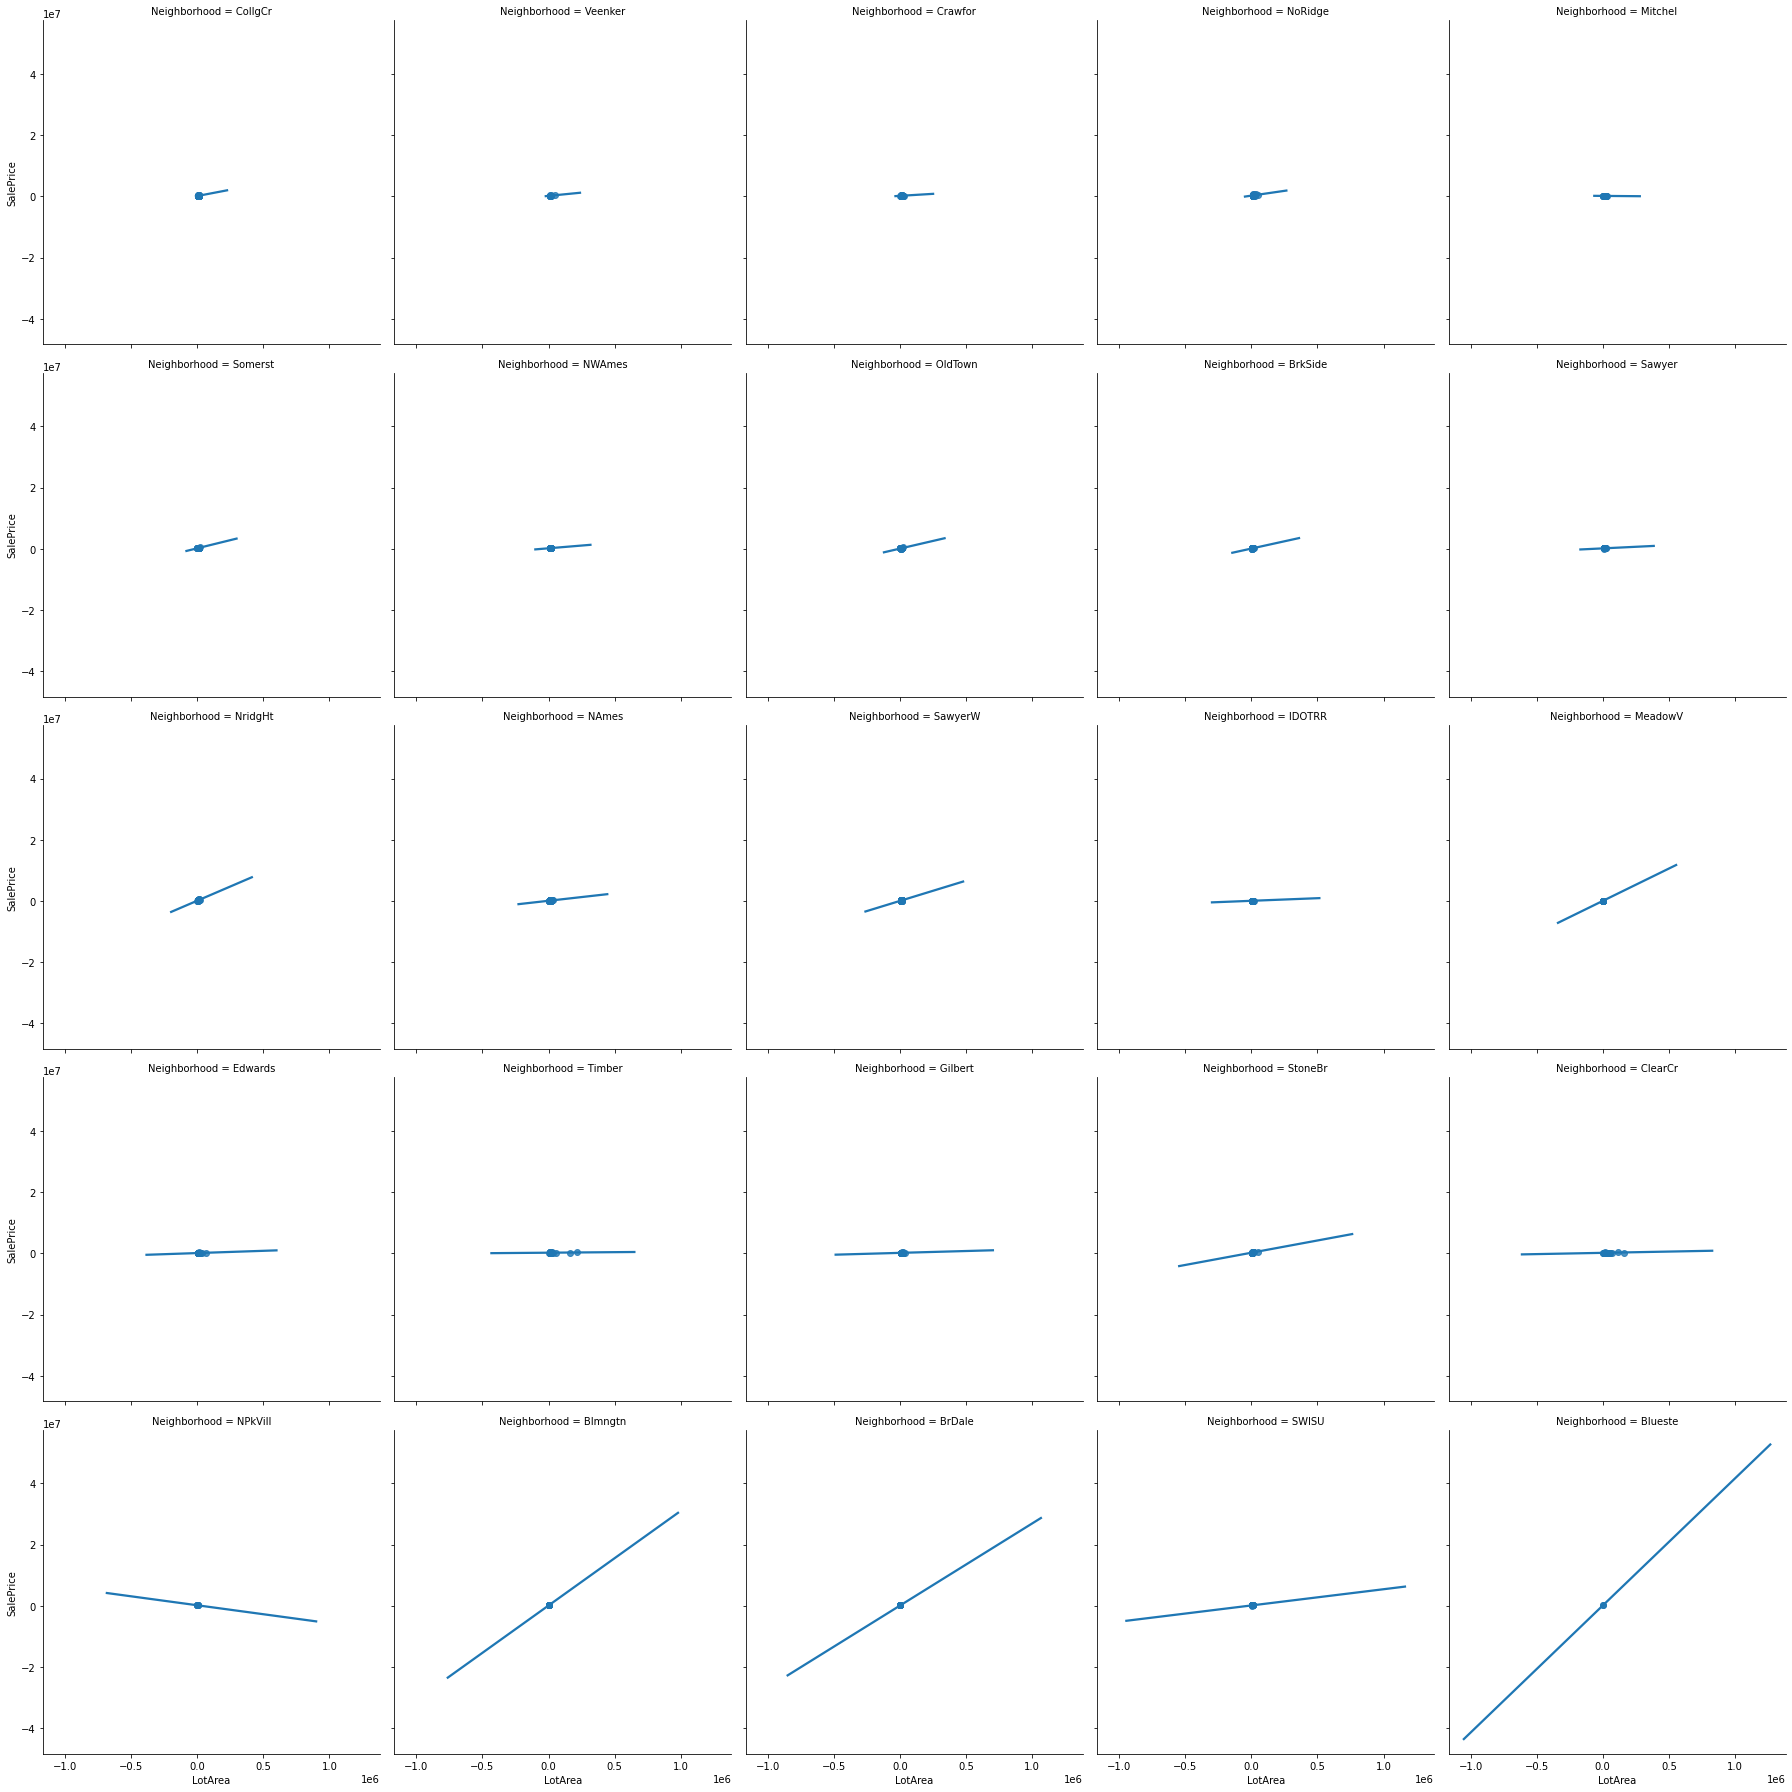

In [50]:
g = sns.lmplot(x="LotArea", 
            y="SalePrice", 
            col="Neighborhood",
            col_wrap = 5,
            data=df,
            ci = None)

## Double story

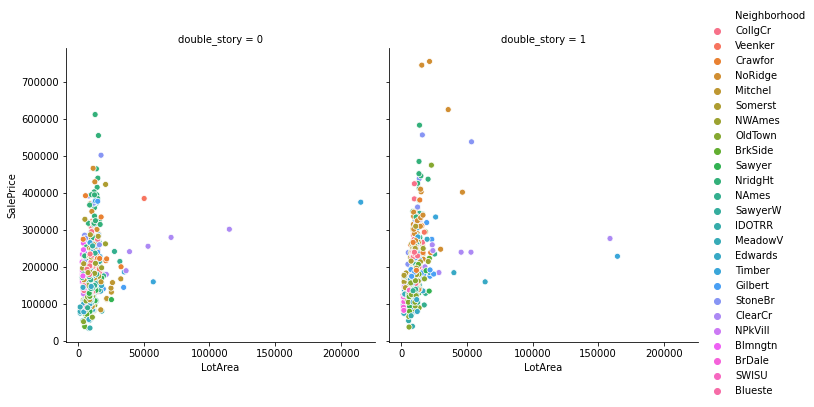

In [122]:
## Check double story
df['double_story'] = np.where(df['2ndFlrSF'] > 0, 1, 0)
sns.relplot(x="LotArea", 
            y="SalePrice", 
            hue="Neighborhood",
            col="double_story",
            kind="scatter", 
            col_wrap = 2,
            data=df)

In [87]:
df['2ndFlrSF'].value_counts()

0       829
728      10
504       9
672       8
546       8
       ... 
788       1
1116      1
1112      1
1111      1
1872      1
Name: 2ndFlrSF, Length: 417, dtype: int64

In [88]:
df['1stFlrSF'].value_counts()

864     25
1040    16
912     14
848     12
894     12
        ..
1285     1
1287     1
1288     1
1297     1
2053     1
Name: 1stFlrSF, Length: 753, dtype: int64

In [96]:
df['double_story'] = np.where(df['2ndFlrSF'] > 0, 1, 0)

In [97]:
df['double_story'].sum()

631

In [95]:
df['2ndFlrSF'].isna().sum()

0

In [99]:
len(df) - df['double_story'].sum()

829

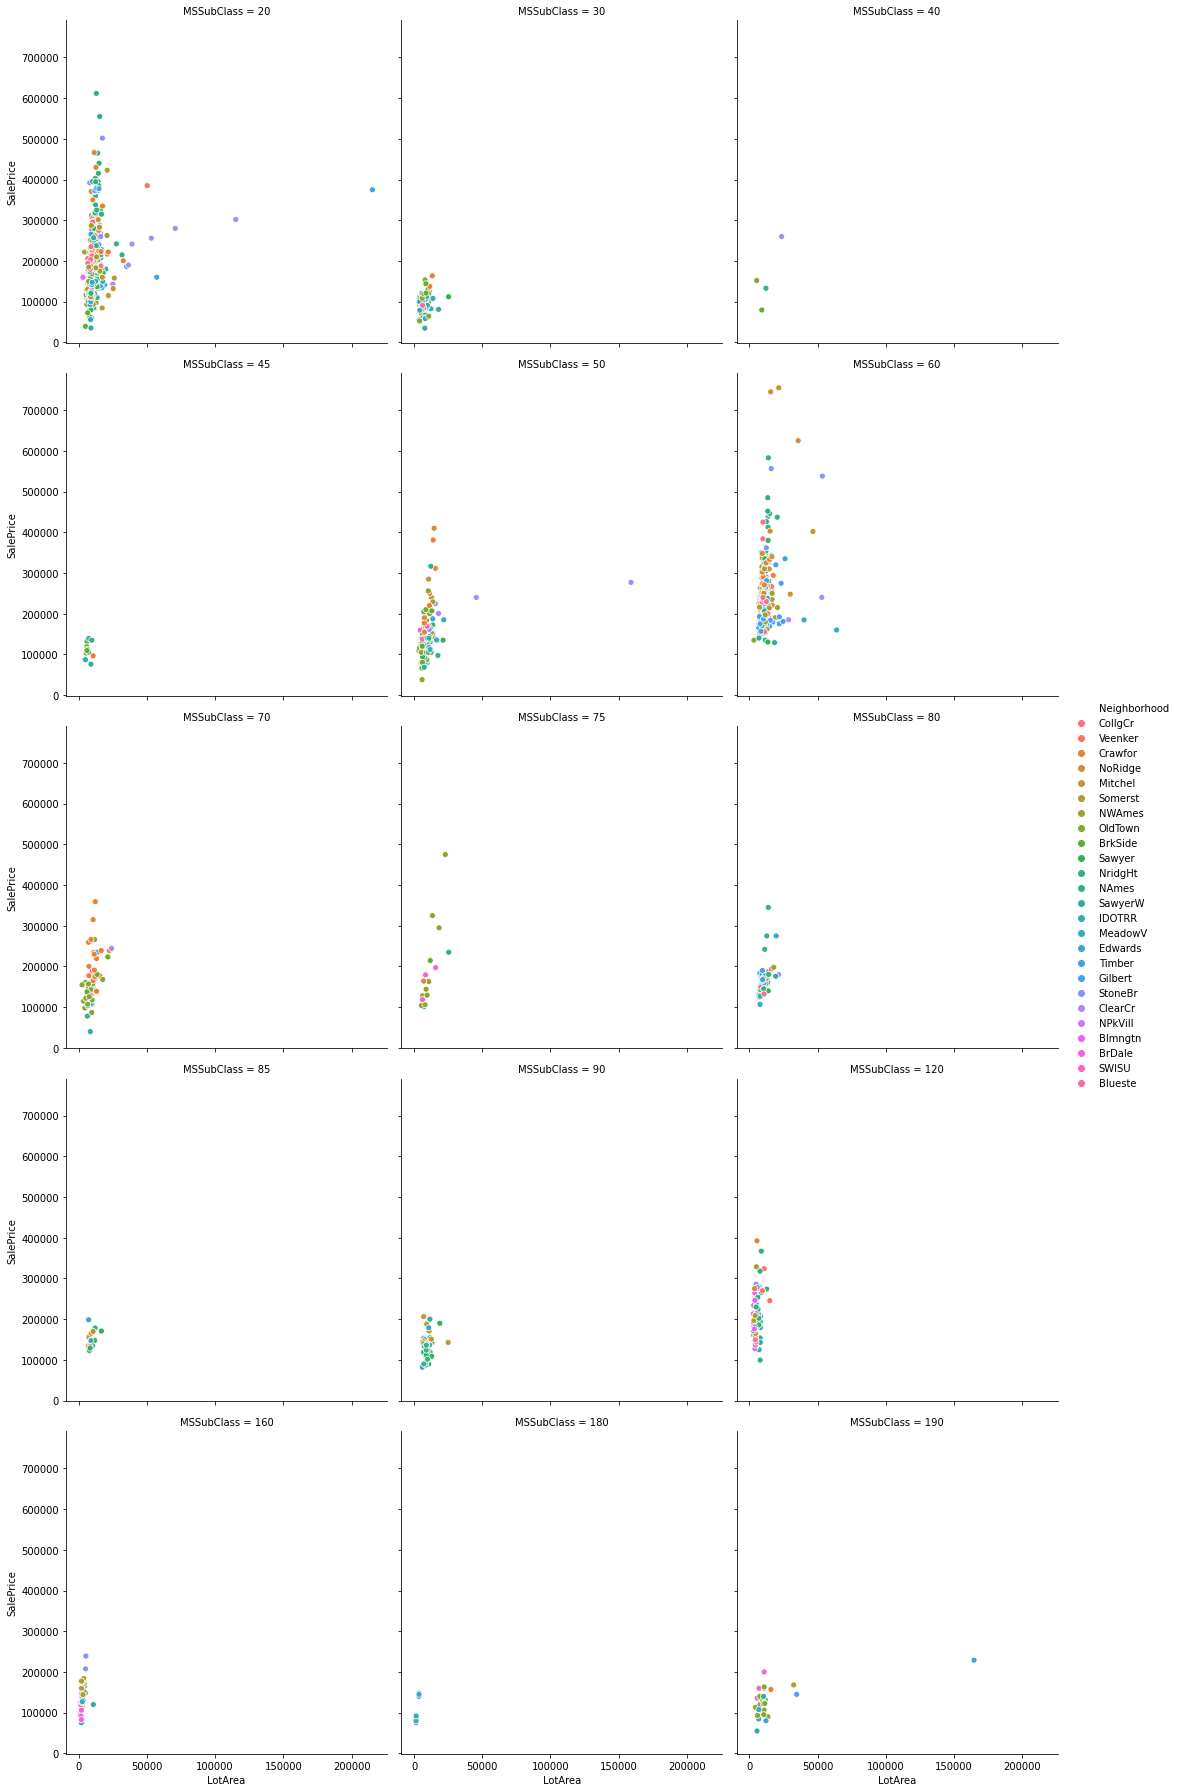

In [123]:
sns.relplot(x="LotArea", 
            y="SalePrice", 
            hue="Neighborhood",
            col="MSSubClass",
            kind="scatter", 
            col_wrap = 3,
            data=df)

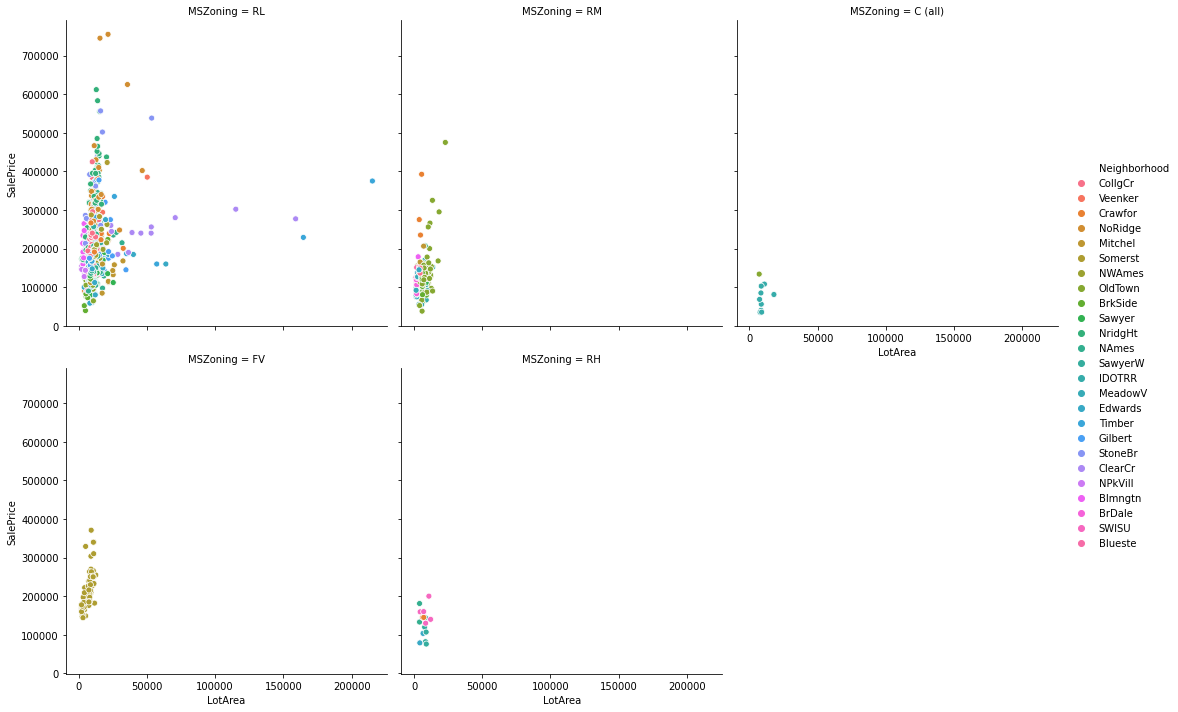

In [124]:
sns.relplot(x="LotArea", 
            y="SalePrice", 
            hue="Neighborhood",
            col="MSZoning",
            kind="scatter", 
            col_wrap = 3,
            data=df)

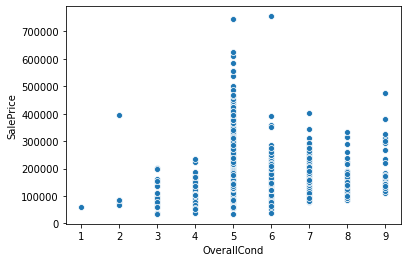

In [131]:
sns.scatterplot(x="OverallCond", 
            y="SalePrice", 
            data=df)

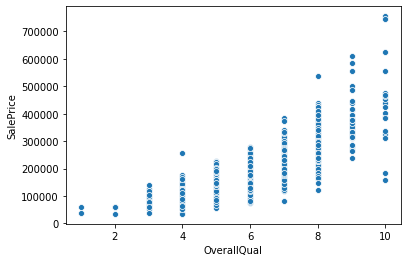

In [134]:
sns.scatterplot(x="OverallQual", 
            y="SalePrice", 
            data=df)

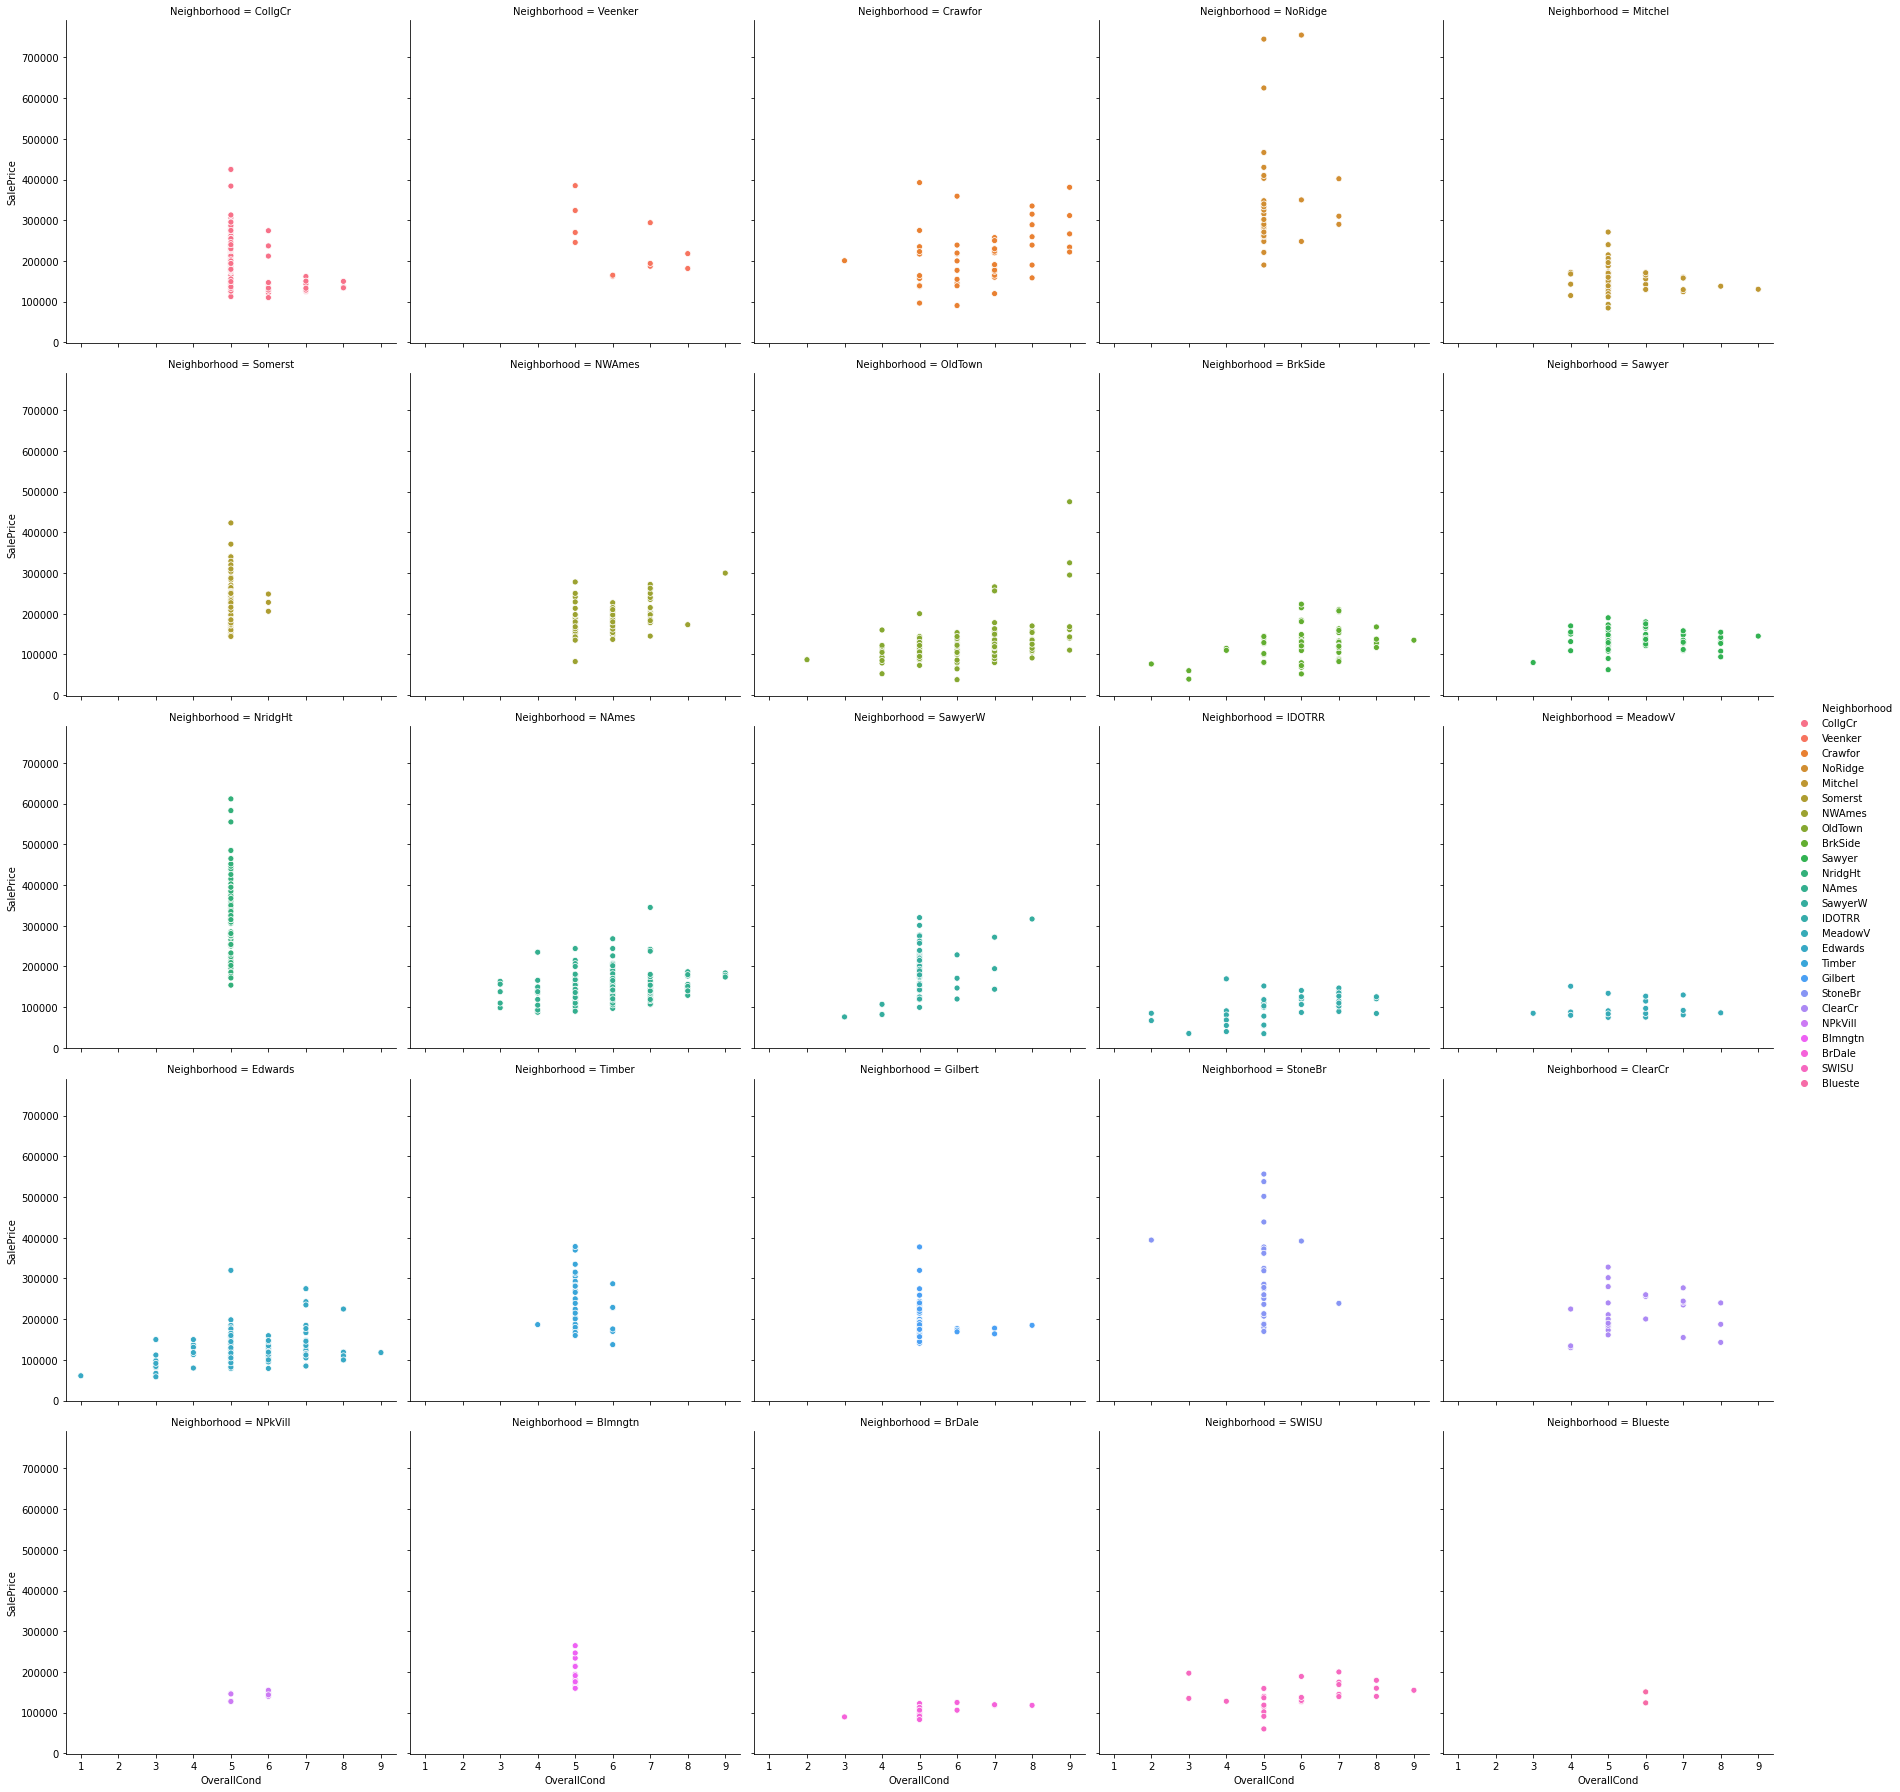

In [133]:
sns.relplot(x="OverallCond", 
            y="SalePrice", 
            hue="Neighborhood",
            col="Neighborhood",
            kind="scatter", 
            col_wrap = 5,
            data=df)

In [110]:
df['no_pool'] = np.where(df['PoolQC'].isna(), 1, 0)

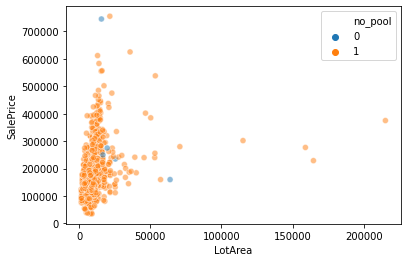

In [113]:
sns.scatterplot(x="LotArea", y="SalePrice", hue="no_pool",
              data=df, alpha=0.5);